# FILE READER

The following code will read several books in .pdf format to later compute the frequency of the words by language.

In [1]:
import os
import pandas as pd
import time
from tqdm import tqdm_notebook as tqdm

# specify the folder's directory where the book files are located
book_dir = './Books'

# create two empty Dataframes to later store the info computed from every book file
count_result = pd.DataFrame(columns=['lang', 'author', 'book_title', 'words', 'freq'])
stat_result = pd.DataFrame(columns=['lang', 'author', 'book_title', 'process_time',
                                    'uniq_words','total_words'])

time_start = time.time()
time_accum = 0

# iterate and read every file by language, author, and title
for language in tqdm(os.listdir(book_dir)):
    for author in os.listdir(book_dir + '/' + language):
        for title in os.listdir(book_dir + '/' + language + '/' + author):
            
            # this is the resulting path...
            title_path = book_dir + '/' + language + '/' + author + '/' + title
            
            # now it will read on every file
            with open(title_path, 'r', encoding='utf8') as current_file:
                text = current_file.read()
                
                # the following lines clean the book's content for the further analysis
                text = text.replace('\n', ' ').replace('\r', ' ') 
                text = text.lower()    # turn every letter into lower case
                
                # remove the most common symbols, marks, and numbers
                skip_list = [',', '.', ':', ';', '¿', '?', '¡', '!', '#' '"', "'", '-', '(', ')', '{', '}',
                            '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
                
                for ch in skip_list:
                    text = text.replace(ch, '')
                
                # create a temporary dataframe for every book title to store and isolate the stats collected
                temp_df = pd.DataFrame(columns=['lang', 'author', 'book_title', 'words', 'freq'])
                
                # this loop will count the frequency for every unique word
                for word in list(filter(None, text.split(' '))):
                    if word in temp_df['words'].values:
                        temp_df.loc[temp_df.words == word, 'freq'] += 1
                    else:
                        temp_df.loc[len(temp_df)] = language, author, title.replace('.txt', ''), word, 1
                
                temp_df = temp_df.sort_values('freq', ascending=False) # sort the dataframe in descending order
                
                # collect the data from the current file before moving to the next one
                process_time = round(time.time() - time_accum - time_start, 2)
                time_accum += process_time
                stat_result.loc[len(stat_result)] = language, author, title.replace('.txt', ''), process_time, len(temp_df), sum(temp_df['freq'].values)
            
            # this will save and accumulate the info collected from the temporary dataframe into a different table
            count_result = pd.concat([count_result, temp_df], axis=0, ignore_index=True)

# output the results as a .csv file
stat_result.to_csv('stat_summary.csv', sep=',')
count_result.to_csv('word_frequencies.csv', sep=',')

print('\n-----------------------------')
print(stat_result)
print('\n-----------------------------')
print(count_result)




-----------------------------
           lang         author                              book_title  \
0       english    shakespeare               A Midsummer Night's Dream   
1       english    shakespeare                                  Hamlet   
2       english    shakespeare                                 Macbeth   
3       english    shakespeare                                 Othello   
4       english    shakespeare                             Richard III   
5       english    shakespeare                        Romeo and Juliet   
6       english    shakespeare                  The Merchant of Venice   
7        french      chevalier                          L'ale de sable   
8        french      chevalier  L'enfer et le paradis de l'autre monde   
9        french      chevalier                            La capitaine   
10       french      chevalier             La fille des indiens rouges   
11       french      chevalier                      La fille du pirate   
12    

[825249 rows x 5 columns]


#### VISUALIZE THE RESULTS

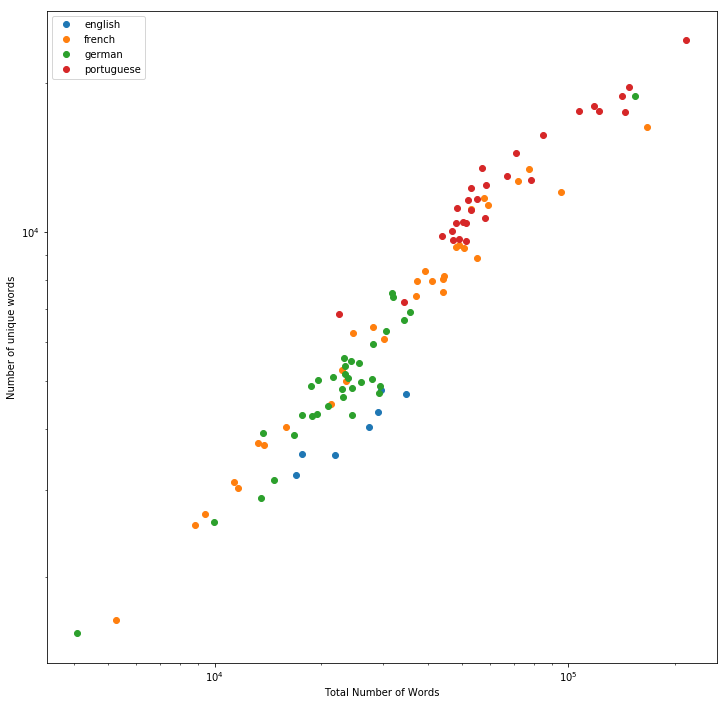

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))

# plot the stat from every book by language
for language in os.listdir(book_dir):
    subset = stat_result[stat_result.lang == language]   # filter the stat data by language
    plt.loglog(subset.total_words, subset.uniq_words, "o", label = language)

plt.legend()
plt.xlabel("Total Number of Words")
plt.ylabel("Number of unique words")
plt.savefig("total_vs_unique_words.png")
plt.show()